In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t, norm, rankdata
from sklearn.linear_model import LinearRegression

# Enter 2 columns of B (before), A (after)
dt = {'B': [15,16,19,24,24,27,29,31,37,43], 
      'A': [18,21,59,23,44,44,50,35,30,37]}

df = pd.DataFrame(dt)

df['Diff'] = df.apply(lambda X: X['A'] - X['B'], axis=1)
df['Sign'] = df['Diff'].apply(lambda d: 1 if d > 0 else -1 if d < 0 else 0)
df['Rank'] = rankdata(df.Diff * df.Sign) * df.Sign
df

,B,A,Diff,Sign,Rank
0,15,18,3,1,2.0
1,16,21,5,1,4.0
2,19,59,40,1,10.0
3,24,23,-1,-1,-1.0
4,24,44,20,1,8.0
5,27,44,17,1,7.0
6,29,50,21,1,9.0
7,31,35,4,1,3.0
8,37,30,-7,-1,-6.0
9,43,37,-6,-1,-5.0


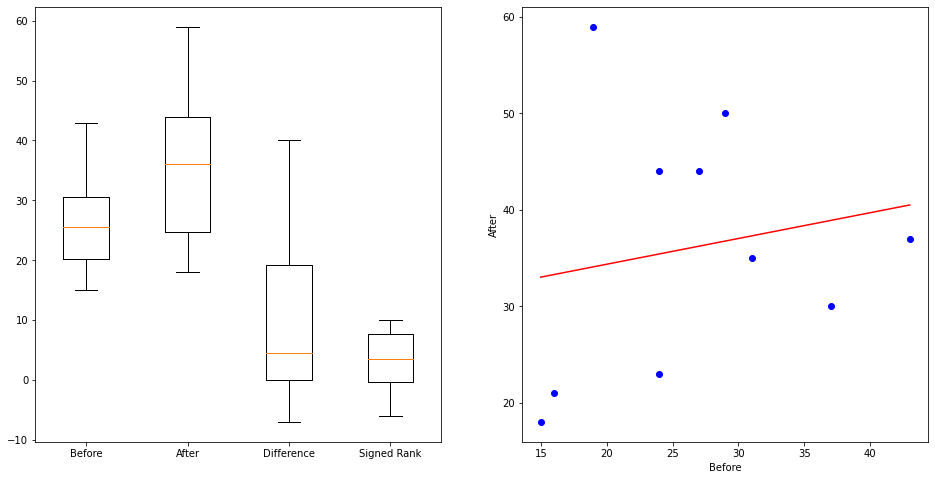

In [2]:
w, h = 2, 1
fig, axes = plt.subplots(h, w, figsize=(16, 8))

axes[0].boxplot([df.B, df.A, df.Diff, df.Rank], 
                labels=['Before', 'After', 'Difference', 'Signed Rank'])
axes[1].scatter(df.B, df.A, color='b')
axes[1].set_xlabel('Before')
axes[1].set_ylabel('After')

model = LinearRegression()
model.fit(df['B'].values.reshape(-1,1), df['A'].values.reshape(-1,1))
Y = model.predict(df.B.values.reshape(-1,1))
axes[1].plot(df.B, Y, color='r')

plt.show()

#### 1. Difference Test

In [3]:
# The mean of Diff is normally distributed, hence
mean = df['Diff'].mean()
std_mean = df['Diff'].std() / (len(df))**0.5
round(mean, 3), round(std_mean, 3)

(9.6, 4.648)

In [4]:
# Set significant level alpha, degree of freedoms, one tail or two tails.
alpha, ddof = 0.05, len(df) - 1
two_tails = False

# Compute the t statistic value
if two_tails:
    t_alpha = t.ppf(1 - alpha/2, ddof) 
else:
    t_alpha = t.ppf(1 - alpha, ddof) 

round(t_alpha, 3)

1.833

In [5]:
# Compute confidence interval according to the significant level alpha
ci = (mean - t_alpha * std_mean, mean + t_alpha * std_mean)
round(ci[0], 3), round(ci[1], 3)

(1.08, 18.12)

In [6]:
# Asumme H0 is true, then D = 0, hence the t statistic:
t_null = mean / std_mean
round(t_null, 3)

2.065

In [7]:
# Evaluate the rejection of H0
if t_null > t_alpha:
    print('The test statistic is statistically significant. H0 should be rejected!')
else:
    print('The test statistic is not . H0 cannot be rejected!')

The test statistic is way extreme. H0 should be rejected!


In [8]:
p_value = 1 - t.cdf(t_null, ddof)

if two_tails:
    print(round(2 * p_value, 3))
else:
    print(round(p_value, 3))

0.034


In [9]:
# Other way to compute the p_value using the survival function of stats
p_value = t.sf(t_null, ddof)

if two_tails:
    print(round(2 * p_value, 3))
else:
    print(round(p_value, 3))

0.034


#### 2. Signed Rank

In [10]:
# The mean of poisitive Rank is normally distributed, hence
n = len(df)
mean = n * (n + 1) / 4
std_ = (n * (n + 1) * (2 * n + 1) / 24)**0.5
round(mean, 3), round(std_, 3)

(27.5, 9.811)

In [11]:
# Set significant level alpha, one tail or two tails.
alpha = 0.05
two_tails = False

# Compute the Z statistic value
if two_tails:
    Z_alpha = norm.ppf(1 - alpha/2) 
else:
    Z_alpha = norm.ppf(1 - alpha) 

round(Z_alpha, 3)

1.645

In [12]:
# Compute confidence interval according to the significant level alpha
ci = (mean - Z_alpha * std_, mean + Z_alpha * std_)
round(ci[0], 3), round(ci[1], 3)

(11.363, 43.637)

In [13]:
# Asumme H0 is true, then Rank = 0, hence the Z statistic:
negative_sum = df['Rank'][df.Rank < 0].sum() * (-1)
Z_null = abs(negative_sum - mean) / std_
round(Z_null, 3)

1.58

In [14]:
# Evaluate the rejection of H0
if Z_null > Z_alpha:
    print('The test statistic is way extreme. H0 should be rejected!')
else:
    print('The test statistic is normal. H0 cannot be rejected!')

The test statistic is normal. H0 cannot be rejected!


In [15]:
p_value = 1 - norm.cdf(Z_null)

if two_tails:
    print(round(2 * p_value, 3))
else:
    print(round(p_value, 3))

0.057


In [16]:
# Other way to compute the p_value using the survival function of stats
p_value = norm.sf(Z_null)

if two_tails:
    print(round(2 * p_value, 3))
else:
    print(round(p_value, 3))

0.057
